In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from sklearn.datasets import load_iris
iris_df = load_iris( as_frame=True)

In [10]:
data = iris_df.frame
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [14]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

No missing data :-)

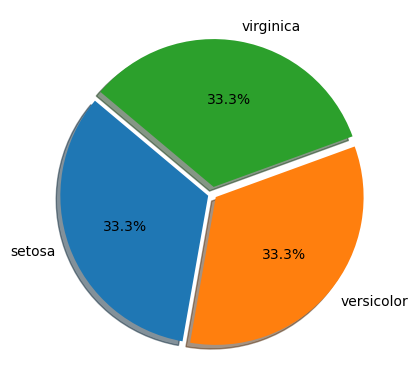

In [47]:
plt.pie(data['target'].value_counts(), 
        labels=iris_df.target_names, 
        autopct='%1.1f%%', 
        startangle=140, 
        explode=(0.03, 0.03, 0.05),
        shadow=True)
plt.show()

C:\Users\saura_p6\AppData\Local\Temp\ipykernel_56240\2181094752.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='Set2')


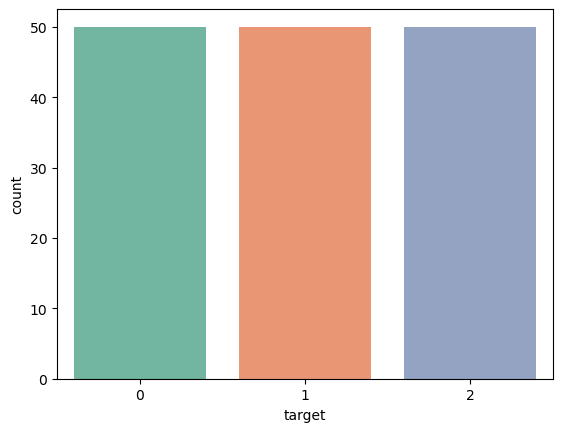

In [23]:
sns.countplot(x='target', data=data, palette='Set2')
plt.show()

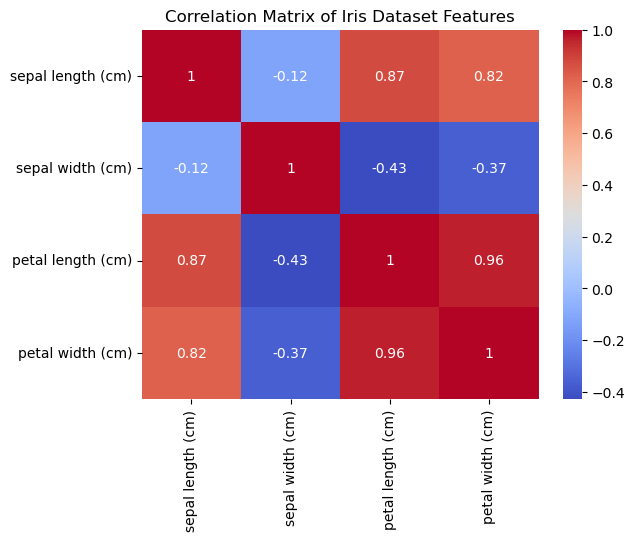

In [26]:
correlation_matrix = data.drop(columns=["target"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()

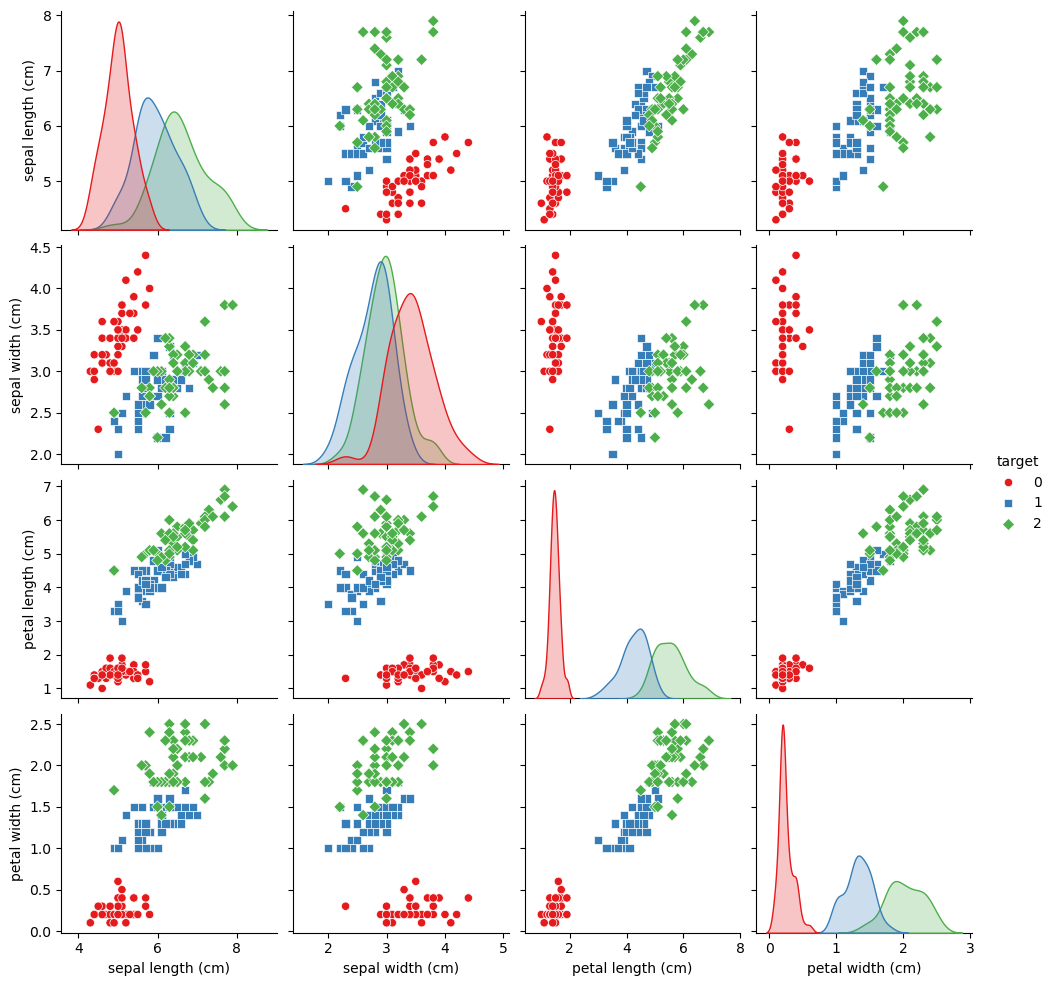

In [50]:
sns.pairplot(data, hue='target', palette='Set1', markers=["o", "s", "D"], height=2.5)
plt.show()

In [51]:
X = data.drop(columns=["target"])
y = data["target"]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
gnb = GaussianNB()
gnb.fit(train_X, train_y)
y_pred = gnb.predict(test_X)

In [57]:
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy of Gaussian Naive Bayes: {accuracy:.2f}")

Accuracy of Gaussian Naive Bayes: 0.90


In [ ]:
confusion = confusion_matrix
print("Confusion Matrix: \n", confusion)

Confusion Matrix: 
 [[9 0 0]
 [0 9 3]
 [0 0 9]]


In [ ]:
print(classification_report(test_y, y_pred, target_names=iris_df.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.75      0.86        12
   virginica       0.75      1.00      0.86         9

    accuracy                           0.90        30
   macro avg       0.92      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

